In [48]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from supervenn import supervenn as spv
import warnings
sys.path.append('/Users/apaulson/repos/data-proc')
import plotting_functions_misc_akp as pfma
%config Completer.use_jedi=False
!pwd

/Users/apaulson/repos/DILI/preprocessing_data


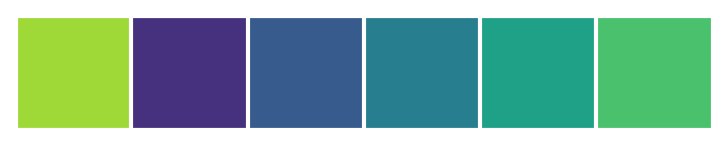

In [49]:
colors=[(0.626579, 0.854645, 0.223353),(0.275191, 0.194905, 0.496005), (0.212395, 0.359683, 0.55171), (0.153364, 0.497, 0.557724), (0.122312, 0.633153, 0.530398), (0.288921, 0.758394, 0.428426), ]
sns.set_palette(colors)
pal=sns.color_palette(colors)
sns.palplot(pal)

# read in initial data

In [50]:
dilirank=pd.read_csv('dilirank/DILIRankST_smiles_DrugBank.csv')
dilirank.head(2)

,LTKBID,DILIRank_PubChem_CID,LabelCompoundName,ApprovalYear,DILIConcern,SeverityClass,LabelSection,AdjudicatedDILI,vDILIConcern,Greene_Annotation,...,KEGG_Compound_ID,KEGG_Drug_ID,PubChem_Compound_ID,PubChem_Substance_ID,ChEBI_ID,ChEMBL_ID,HET_ID,ChemSpider_ID,BindingDB_ID,db_base_smiles
0,LT00003,667490,mercaptopurine,1953.0,Most-DILI-Concern,8.0,Warnings and precautions,Yes,vMost-DILI-Concern,HH,...,C02380,D04931,667490.0,46506988.0,94796.0,CHEMBL1425,PM6,580869.0,50423778.0,S=c1nc[nH]c2nc[nH]c12
1,LT00004,1983,acetaminophen,1968.0,Most-DILI-Concern,5.0,Warnings and precautions,Yes,vMost-DILI-Concern,HH,...,C06804,D00217,1983.0,46506142.0,46195.0,CHEMBL112,TYL,1906.0,26197.0,CC(=O)Nc1ccc(O)cc1


In [51]:
chems=pd.read_excel("compounds/MASTER_TCPL_COMPOUND_LIST_20210514.xlsx", engine='openpyxl')
from atomsci.ddm.utils import struct_utils 
chems['base_rdkit_smiles']=chems.pubchem_smiles.apply(struct_utils.base_smiles_from_smiles)
pcidmap=dict(zip(chems.spid.astype(str), chems.casn))

[17:20:42] WARNING: not removing hydrogen atom without neighbors
[17:20:42] WARNING: not removing hydrogen atom without neighbors


In [52]:
# these are chose based on whether the information should go up or down, or we don't know
aenms=[
       'Cell_Health_1_06H_CellCount_TBMAD_L2FI_UP', 'Cell_Health_1_06L_CellCount_TBMAD_L2FI_UP', 'Cell_Health_1_24H_CellCount_TBMAD_L2FI_UP', 'Cell_Health_1_24L_CellCount_TBMAD_L2FI_UP', 
       'Cell_Health_1_06H_CellCount_TBMAD_L2FI_DOWN', 'Cell_Health_1_06L_CellCount_TBMAD_L2FI_DOWN', 'Cell_Health_1_24H_CellCount_TBMAD_L2FI_DOWN', 'Cell_Health_1_24L_CellCount_TBMAD_L2FI_DOWN', 
       'Cell_Health_1_06H_MMP_TBMAD_L2FI_DOWN', 'Cell_Health_1_06L_MMP_TBMAD_L2FI_DOWN', 'Cell_Health_1_24H_MMP_TBMAD_L2FI_DOWN', 'Cell_Health_1_24L_MMP_TBMAD_L2FI_DOWN', 
       'Cell_Health_1_06H_MMP_TBMAD_L2FI_UP', 'Cell_Health_1_06L_MMP_TBMAD_L2FI_UP', 'Cell_Health_1_24H_MMP_TBMAD_L2FI_UP', 'Cell_Health_1_24L_MMP_TBMAD_L2FI_UP', 
       'Cell_Health_1_06H_MitoStruct_TBMAD_L2FI_DOWN', 'Cell_Health_1_06H_MitoStruct_TBMAD_L2FI_UP', 'Cell_Health_1_06L_MitoStruct_TBMAD_L2FI_DOWN', 'Cell_Health_1_06L_MitoStruct_TBMAD_L2FI_UP', 
       'Cell_Health_1_24H_MitoStruct_TBMAD_L2FI_DOWN', 'Cell_Health_1_24H_MitoStruct_TBMAD_L2FI_UP', 'Cell_Health_1_24L_MitoStruct_TBMAD_L2FI_DOWN', 'Cell_Health_1_24L_MitoStruct_TBMAD_L2FI_UP', 
       'Cell_Health_1_06H_NucArea_TBMAD_L2FI_DOWN', 'Cell_Health_1_06H_NucArea_TBMAD_L2FI_UP', 'Cell_Health_1_06L_NucArea_TBMAD_L2FI_DOWN', 'Cell_Health_1_06L_NucArea_TBMAD_L2FI_UP', 
       'Cell_Health_1_24H_NucArea_TBMAD_L2FI_DOWN', 'Cell_Health_1_24H_NucArea_TBMAD_L2FI_UP', 'Cell_Health_1_24L_NucArea_TBMAD_L2FI_DOWN', 'Cell_Health_1_24L_NucArea_TBMAD_L2FI_UP', 
       'Cell_Health_1_06H_ROS_TBMAD_L2FI_UP', 'Cell_Health_1_06L_ROS_TBMAD_L2FI_UP', 'Cell_Health_1_24H_ROS_TBMAD_L2FI_UP', 'Cell_Health_1_24L_ROS_TBMAD_L2FI_UP', 
       'Cell_Health_1_06H_ROS_TBMAD_L2FI_DOWN', 'Cell_Health_1_06L_ROS_TBMAD_L2FI_DOWN', 'Cell_Health_1_24H_ROS_TBMAD_L2FI_DOWN', 'Cell_Health_1_24L_ROS_TBMAD_L2FI_DOWN', 
       'Cell_Health_3_06H_GSH_TBMAD_L2FI_DOWN', 'Cell_Health_3_06H_GSH_TBMAD_L2FI_UP', 'Cell_Health_3_06L_GSH_TBMAD_L2FI_DOWN', 'Cell_Health_3_06L_GSH_TBMAD_L2FI_UP', 
       'Cell_Health_3_24H_GSH_TBMAD_L2FI_DOWN', 'Cell_Health_3_24H_GSH_TBMAD_L2FI_UP', 'Cell_Health_3_24L_GSH_TBMAD_L2FI_DOWN', 'Cell_Health_3_24L_GSH_TBMAD_L2FI_UP', 
       'Cell_Health_3_06H_NucMask_TBMAD_L2FI_DOWN', 'Cell_Health_3_06H_NucMask_TBMAD_L2FI_UP', 'Cell_Health_3_06L_NucMask_TBMAD_L2FI_DOWN', 'Cell_Health_3_06L_NucMask_TBMAD_L2FI_UP', 
       'Cell_Health_3_24H_NucMask_TBMAD_L2FI_DOWN', 'Cell_Health_3_24H_NucMask_TBMAD_L2FI_UP', 'Cell_Health_3_24L_NucMask_TBMAD_L2FI_DOWN', 'Cell_Health_3_24L_NucMask_TBMAD_L2FI_UP', 
       'MRP3_Txptr_Inhib_3H17bE_uptake', 'MRP4_Txptr_Inhib_3HDHEAS_uptake', 'BSEP_Txptr_Inhib_3HTch_uptake', 'NTCP_Txptr_Inhib_3HTch_uptake',]

In [53]:
chems[chems.spid==212]

,spid,chid,chnm,casn,dsstox_substance_id,alt_name_1,alt_name_2,alt_name_3,CASRN_ID,CASRN_alt,...,source,Morgan,SMDC,Proprietary,MRP3_comb,APR_toxcast_MMP,SMDC_new,Chembl_txp_all,Hafey,base_rdkit_smiles
233,212,206,menadione,4055,DTXSID4021715,NaN,NaN,NaN,58-27-5,NaN,...,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CC1=CC(=O)c2ccccc2C1=O


In [54]:
sc1=pd.read_csv('tcpl_db_output/sc1_all_otpt.csv',dtype={'spid': 'str', 'casn': 'str'})
sc2=pd.read_csv('tcpl_db_output/sc2_all_otpt.csv',dtype={'spid': 'str', 'casn': 'str'})
mc3=pd.read_csv('tcpl_db_output/mc3_all_otpt.csv', dtype={'spid': 'str', 'casn': 'str'})
mc5=pd.read_csv('tcpl_db_output/mc56_all_otpt.csv', index_col=0,dtype={'spid': 'str', 'casn': 'str'})
sc1=sc1[sc1.aenm.isin(aenms)]
sc1.aenm=sc1.aenm.str.replace('_DOWN','_DN')
sc2=sc2[sc2.aenm.isin(aenms)]
sc2.aenm=sc2.aenm.str.replace('_DOWN','_DN')
mc3=mc3[mc3.aenm.isin(aenms)]
mc3.aenm=mc3.aenm.str.replace('_DOWN','_DN')
mc5=mc5[mc5.aenm.isin(aenms)]
mc5.aenm=mc5.aenm.str.replace('_DOWN','_DN')
mc5=mc5[mc5.spid!='207']
mc5=mc5[mc5.spid!='212']
mc5=mc5[mc5.spid!='725']
sc2=sc2[sc2.spid!='207']
sc2=sc2[sc2.spid!='212']
sc2=sc2[sc2.spid!='725']

## Choose measurement to analyze

In [89]:
meass=['Txptr','NucArea','CellCount','ROS','MMP','MitoStruct','ATP','NucMask','GSH']
meas=meass[3]
meas

'ROS'

In [90]:
sc2dat=sc2[sc2.aenm.str.contains(meas)]
sc1dat=sc1[sc1.aenm.str.contains(meas)]
mc3dat=mc3[mc3.aenm.str.contains(meas)]
mc5dat=mc5[mc5.aenm.str.contains(meas)]
ch=sc1dat.aenm.iloc[0][12]

In [91]:
ch

'1'

In [92]:
mc3[mc3.spid=='42'].aenm.unique()

array(['MRP3_Txptr_Inhib_3H17bE_uptake',
       'MRP4_Txptr_Inhib_3HDHEAS_uptake', 'BSEP_Txptr_Inhib_3HTch_uptake',
       'NTCP_Txptr_Inhib_3HTch_uptake'], dtype=object)

# SC hits

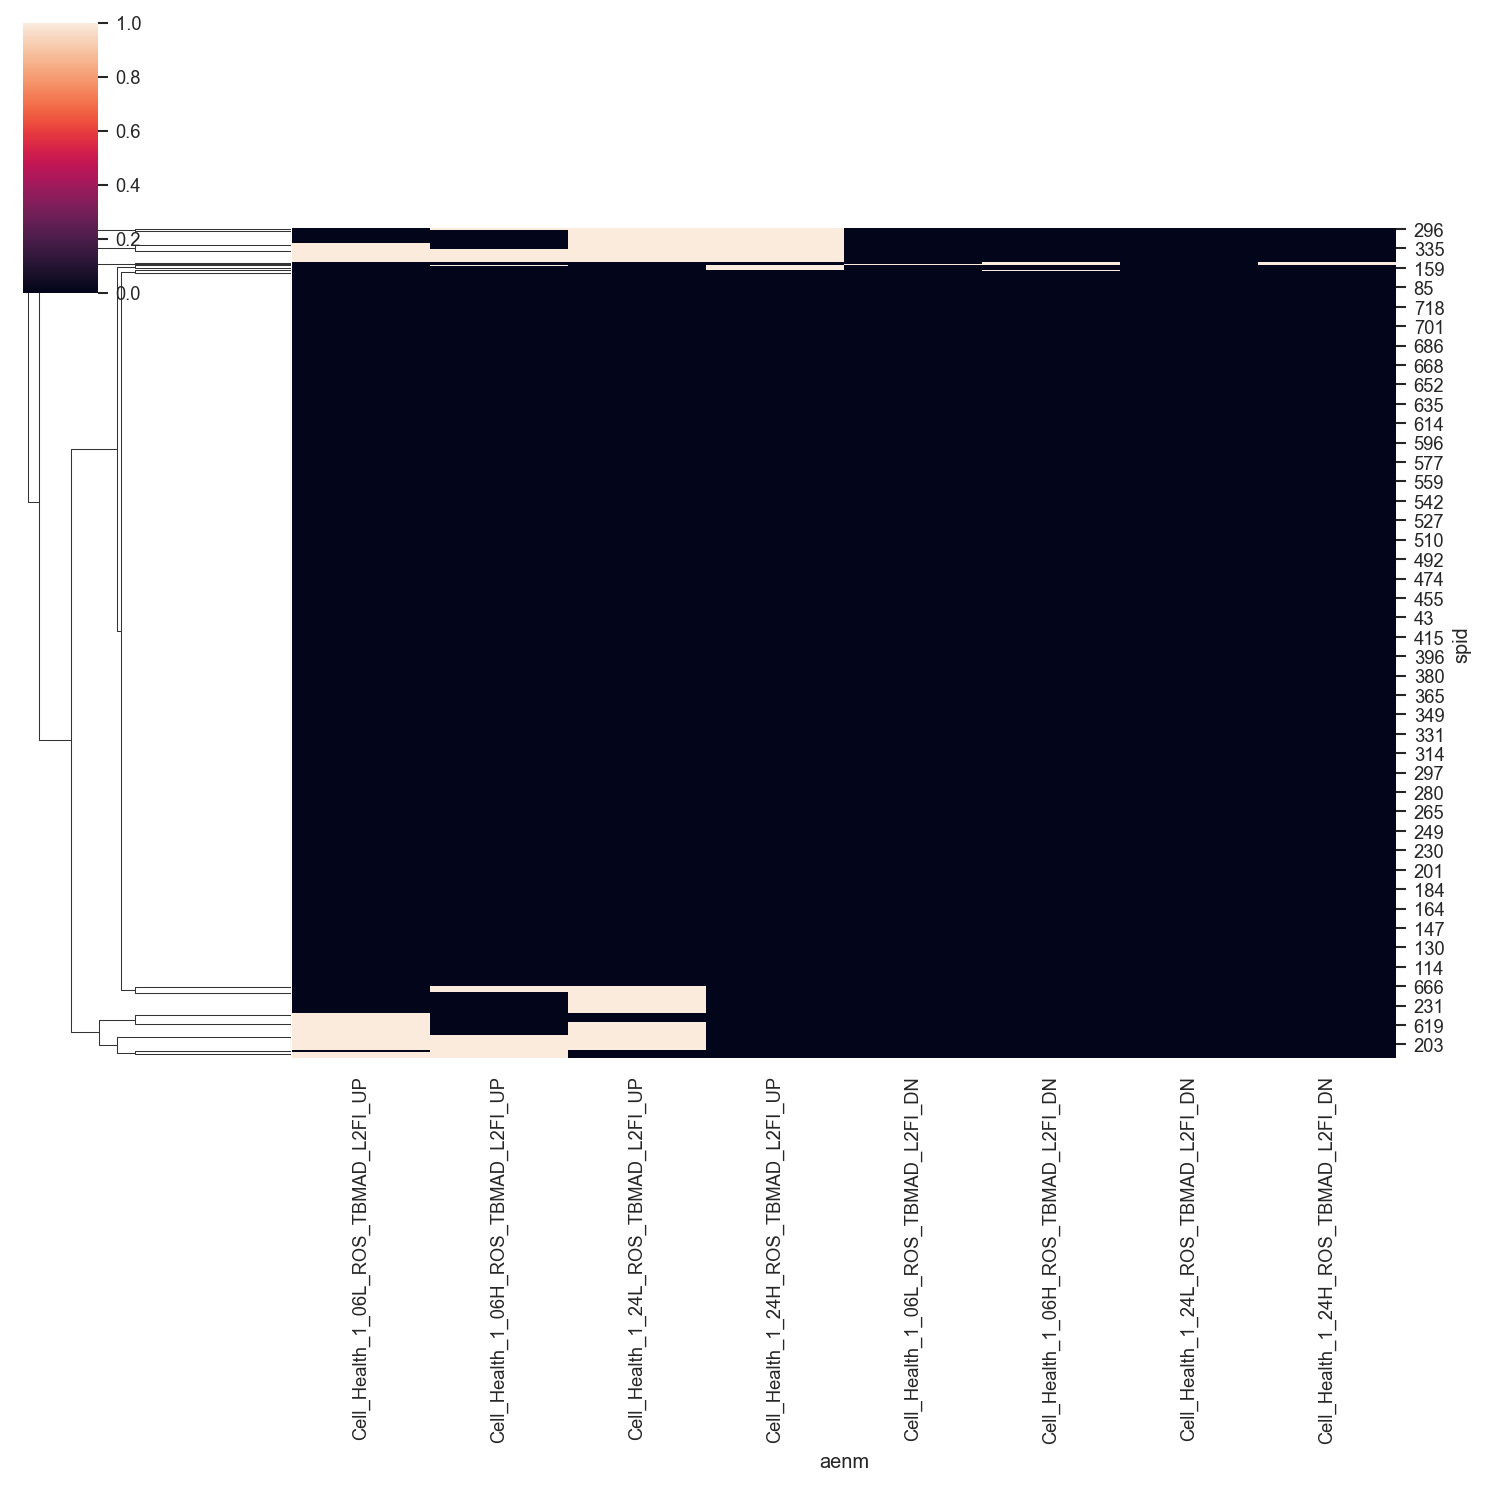

In [93]:
sns.set_context('paper')
piv=sc2dat.pivot_table(columns='aenm',index='spid',values='hitc', aggfunc='max', fill_value=0)
piv
piv=piv[sc1dat.aenm.unique().tolist()]
sns.clustermap(piv, col_cluster=False)


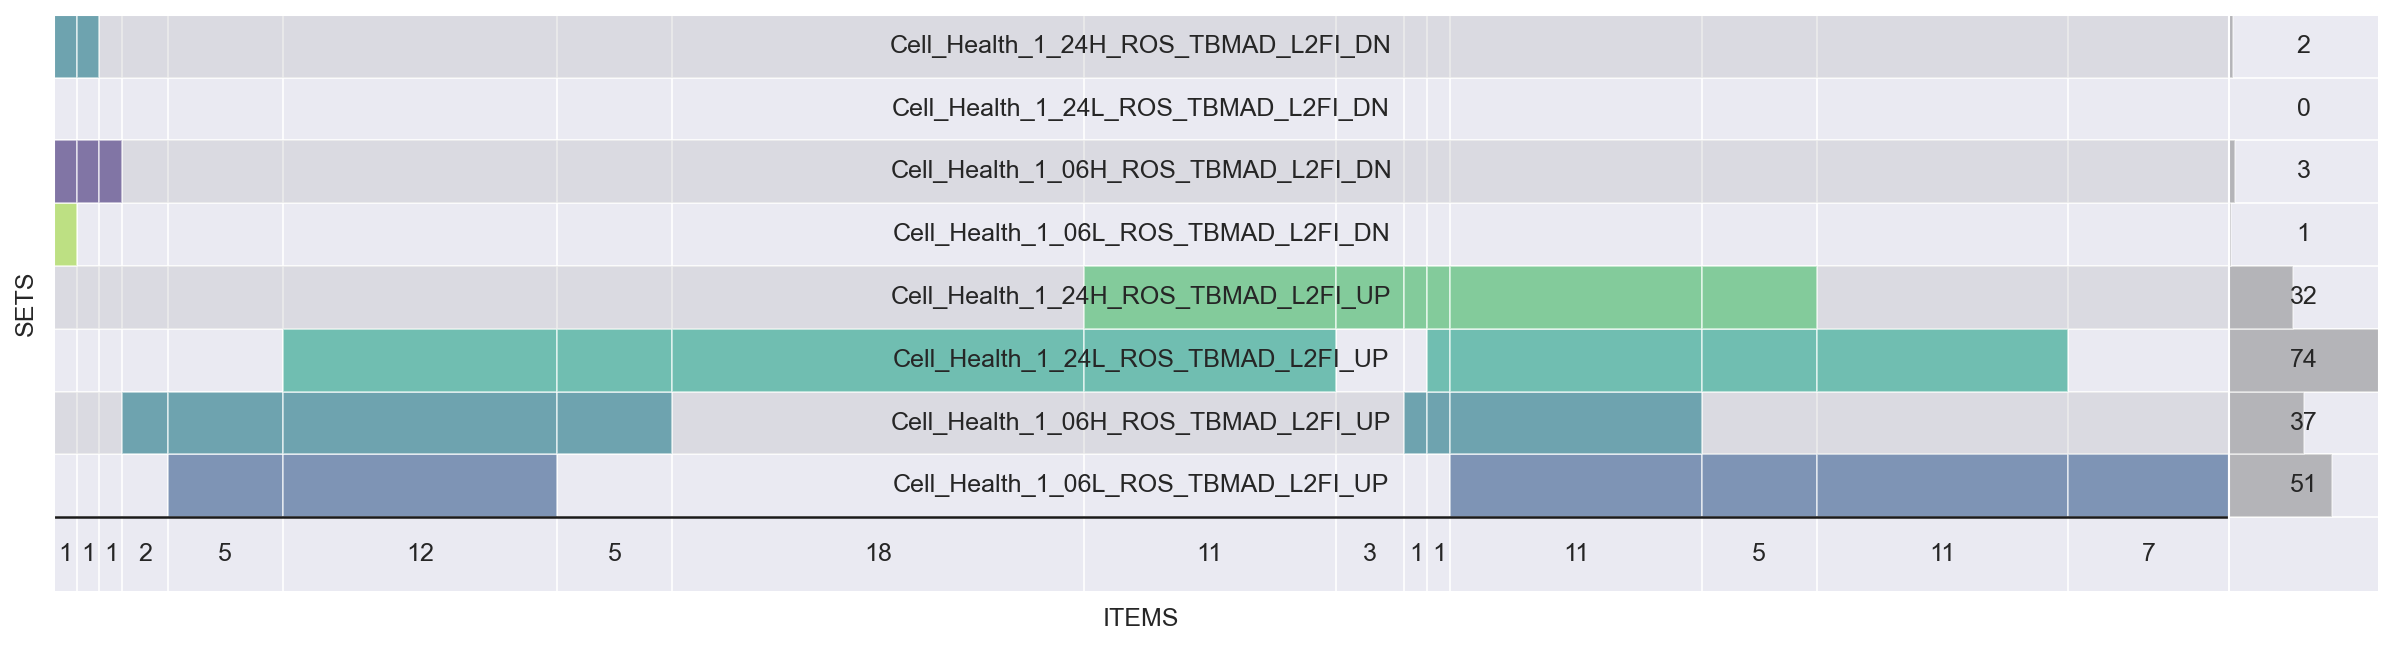

In [94]:
sets=[]
setsdict={}
for col in piv.columns:
    tmpset=set(piv[piv[col]>0].index)
    sets.append(tmpset)
    setsdict[col]=tmpset
fig, ax = plt.subplots(1,figsize=(20,5))
spv(sets, piv.columns, ax=ax, side_plots='right')
fig.savefig(f'./SC_hits/{meas}_venn.png')


In [95]:
schits=piv.melt(value_name='hit', var_name='aenm', ignore_index=False)
schits['direction']=['up' if 'UP' in x else 'down' for x in schits.aenm]
schits=schits.reset_index().groupby(['spid', 'direction']).sum().reset_index()
schits=schits.drop(columns='aenm')
schits['meas']=meas
schits=schits.sort_values('direction')
schits
schits.to_csv(f'./SC_hits/{meas}_SC_hits.csv')

<Axes: xlabel='direction', ylabel='spid'>

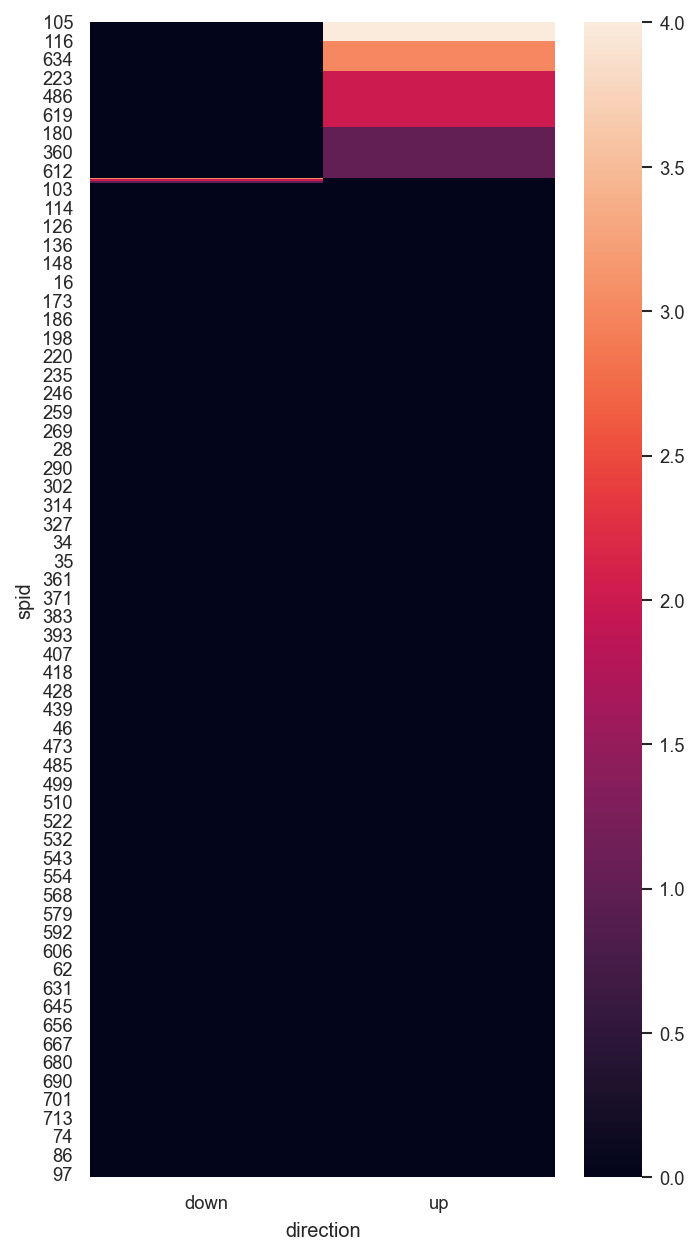

In [96]:
piv2=schits.pivot_table(columns='direction', index='spid', values='hit', fill_value=0)
fig, ax = plt.subplots(1, figsize=(5,10))
sns.heatmap(piv2.sort_values(['up','down'], ascending=False))

In [97]:
schits=schits[schits.hit>0]
dupes=list(set(schits[schits.spid.duplicated(keep=False)].sort_values('spid').spid))
dupes


[]

In [98]:
schits.direction.value_counts()
schits[schits.spid.isin(dupes)].sort_values('spid').to_csv(f'./SC_hits/{meas}_SC_dupes.csv')
schits[schits.spid.isin(dupes)].sort_values('spid')
if len(dupes)>0:
    sc1dupes=sc1dat[sc1dat.spid.isin(dupes)]
    sc1dupes.spid=sc1dupes.spid.astype(int)
    sc1dupes=sc1dupes.sort_values('spid')
    sc1dupes.spid=sc1dupes.spid.astype(str)
    sc2dupes=sc2dat[sc2dat.spid.isin(dupes)]
    alldupes=sc1dupes.merge(sc2dupes)
    alldupes[['null1','timegluc','meas','null2','null3','dir']]=alldupes.aenm.str.rsplit(pat='_',n=5,expand=True)
    alldupes['aenm_short']=alldupes.aenm.str[14:]
    alldupes['time']=alldupes.timegluc.str[0:2]
    alldupes['gluc']=alldupes.timegluc.str[-1]
    alldupes=alldupes.sort_values('aeid')
    alldupes.aeid=alldupes.aeid.astype(str)

    g=sns.relplot(data=alldupes, x='aenm_short', y='resp', col='spid', col_wrap=4, hue='hitc')
    for i, axes in enumerate(g.axes.flat):
        if i>=len(g.axes.flat)-4:
            # axes.set_xticks(axes.get_xticks(), axes.get_xticklabels())
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=15, ha='right')

# MC hits

In [99]:
# piv[piv.min(axis='columns')==-1]

In [100]:
# change hitc to 0 if IC50 is >111 uM
mc5dat['hitc111']=mc5dat.hitc
mc5dat['AC50_uM']=10**mc5dat.modl_ga
mc5dat.loc[mc5dat.AC50_uM>111, 'hitc111']=0

/var/folders/h1/vdxppln90rb2qskbcxvx3m5c0000gn/T/ipykernel_87574/3341253921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc5dat['hitc111']=mc5dat.hitc
/var/folders/h1/vdxppln90rb2qskbcxvx3m5c0000gn/T/ipykernel_87574/3341253921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc5dat['AC50_uM']=10**mc5dat.modl_ga


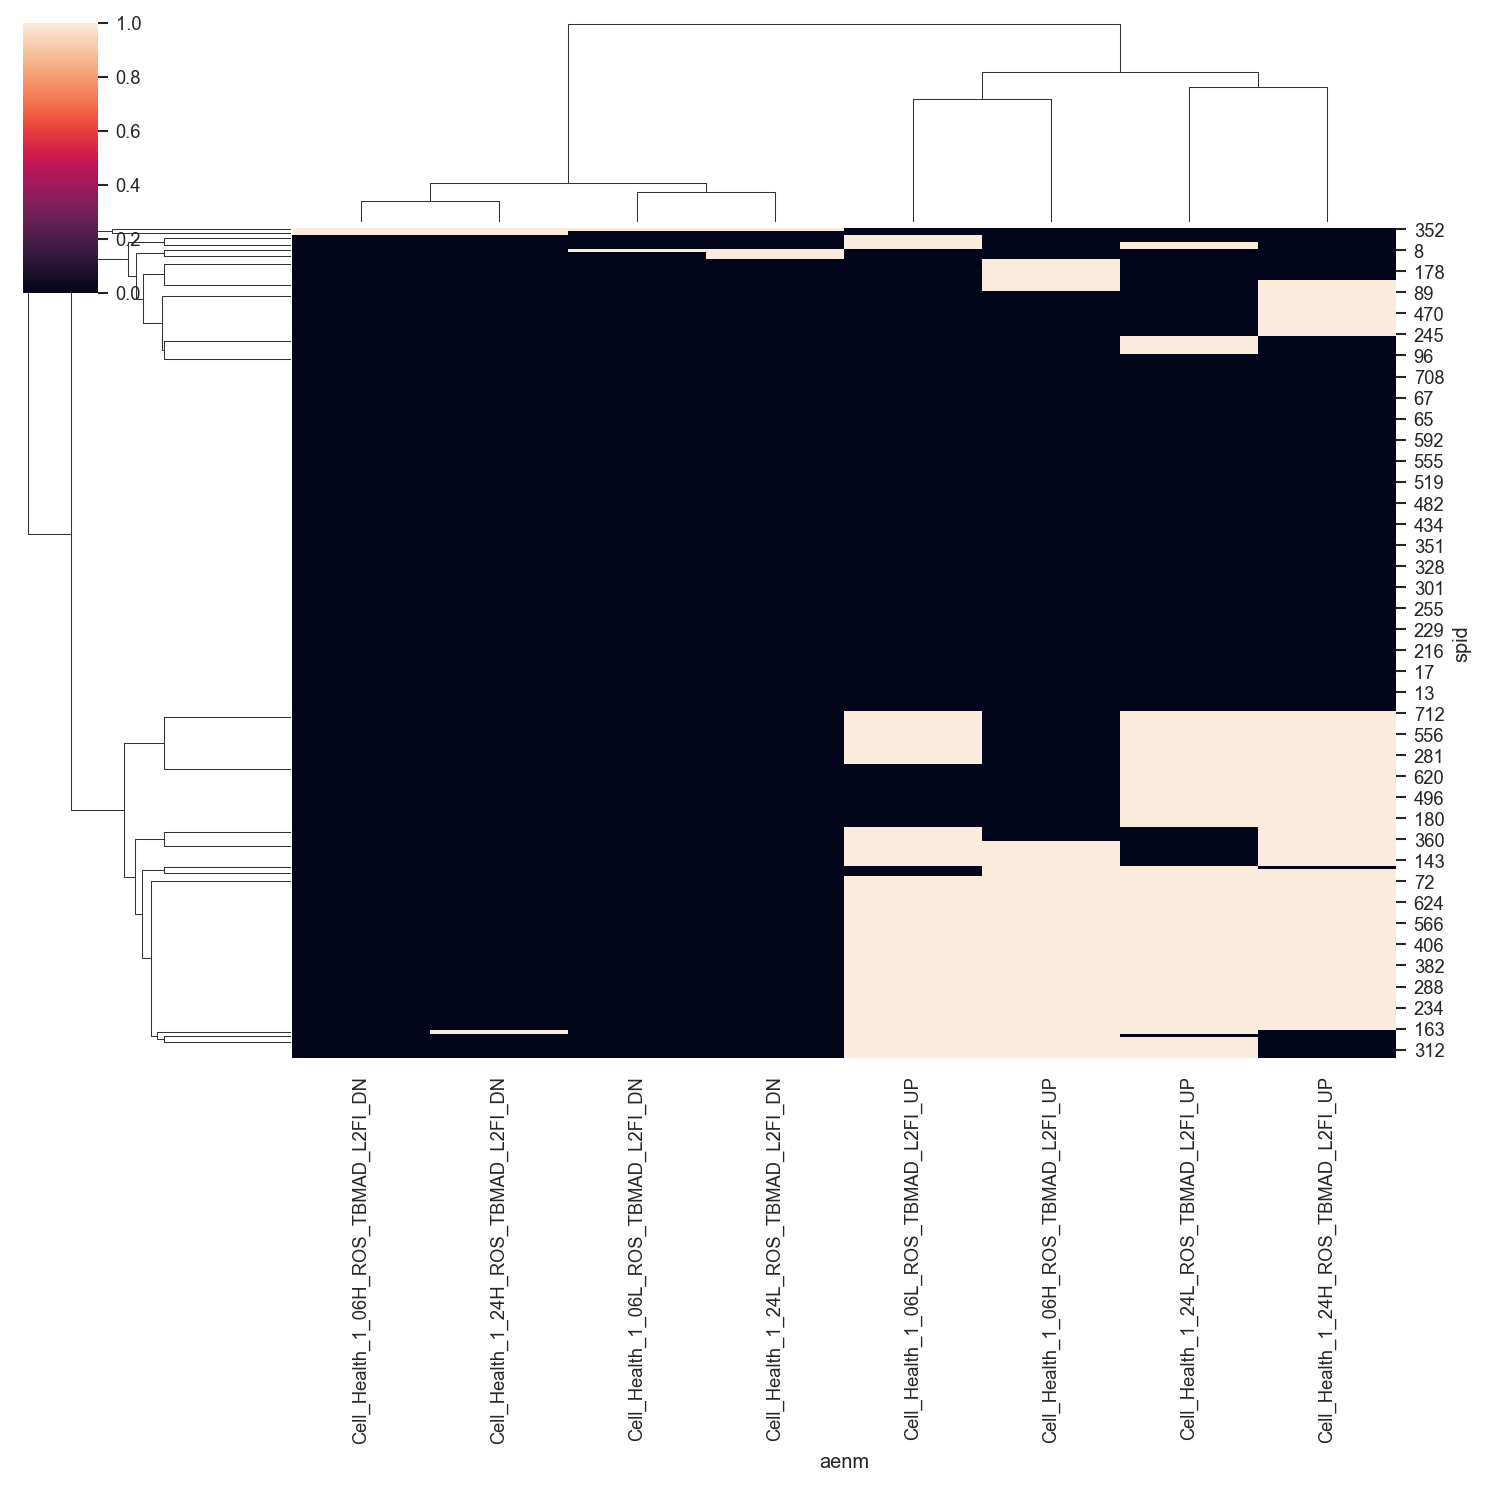

In [101]:
piv=mc5dat.pivot_table(columns='aenm',index='spid',values='hitc111', aggfunc='max', fill_value=0)
piv=piv[mc5dat.aenm.unique().tolist()]
sns.set_context('paper')
sns.clustermap(piv, col_cluster=True)

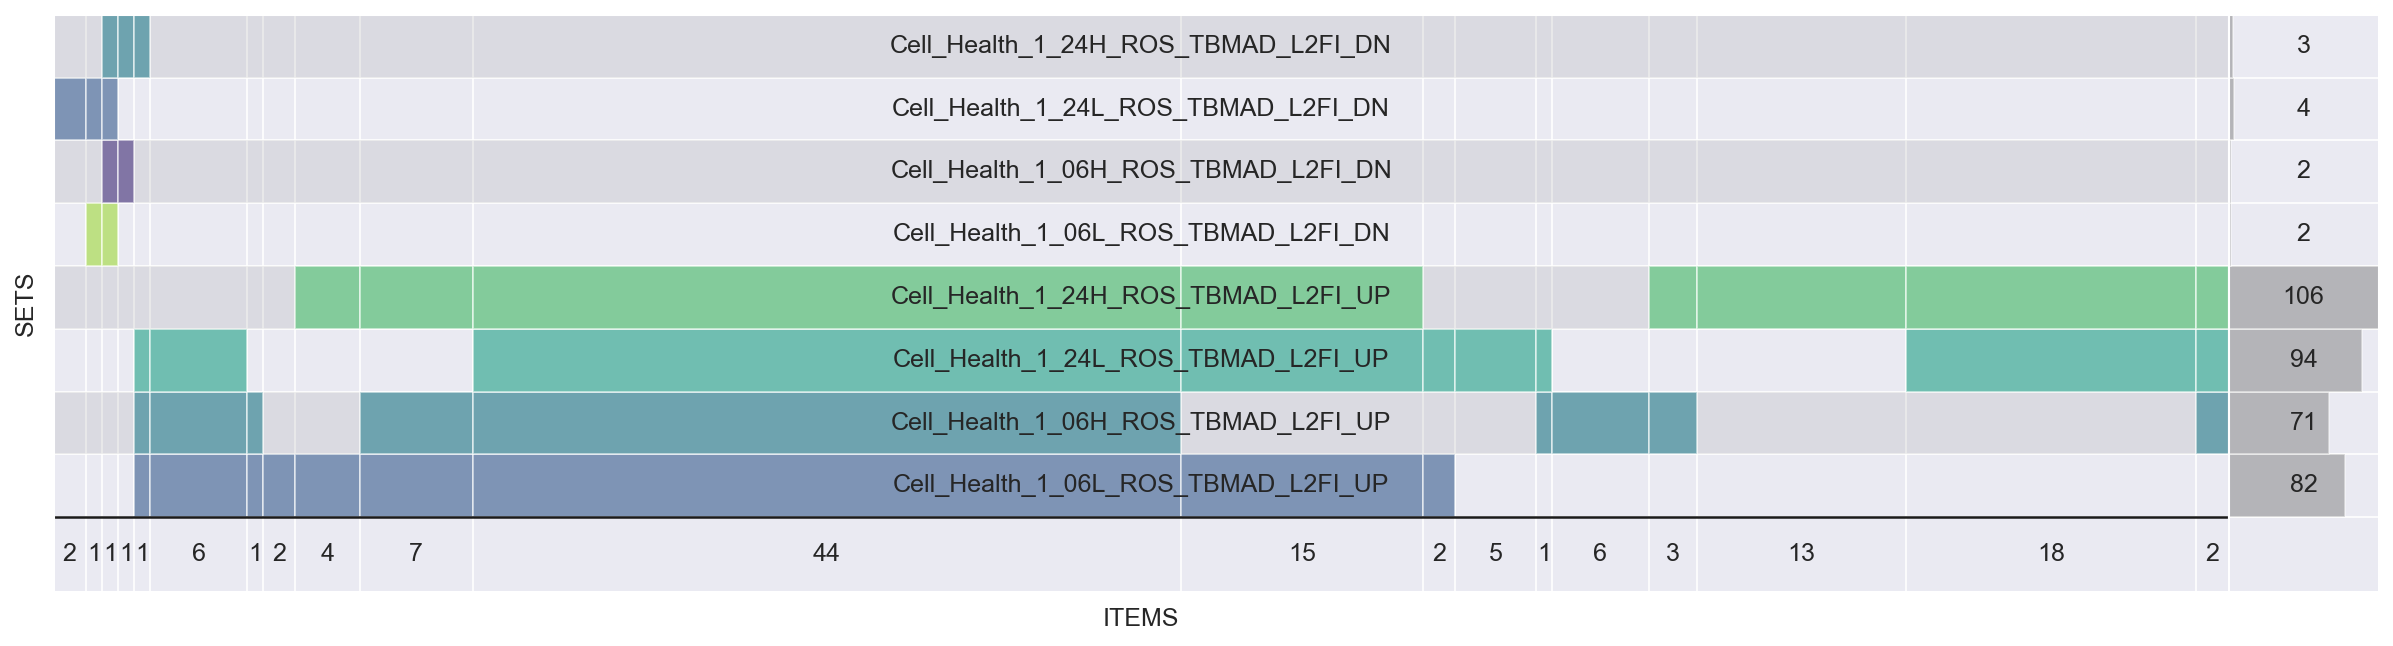

In [102]:
sets=[]
setsdict={}
for col in piv.columns:
    tmpset=set(piv[piv[col]>0].index)
    sets.append(tmpset)
    setsdict[col]=tmpset
fig, ax = plt.subplots(1,figsize=(20,5))
spv(sets, piv.columns, ax=ax, side_plots='right')
fig.savefig(f'./MC_hits/{meas}_venn.png')

In [103]:
# group all hits in either direction together
mchits=piv.melt(value_name='hit111', var_name='aenm', ignore_index=False)
mchits['direction']=['up' if 'UP' in x else 'down' for x in mchits.aenm]
mchits=mchits.reset_index().groupby(['spid', 'direction']).sum().reset_index()
mchits=mchits.drop(columns='aenm')
mchits['meas']=meas
mchits=mchits.sort_values('direction')
mchits

,spid,direction,hit111,meas
0,102,down,0,ROS
270,486,down,0,ROS
268,484,down,0,ROS
266,482,down,0,ROS
264,478,down,0,ROS
...,...,...,...,...
287,511,up,4,ROS
289,513,up,1,ROS
91,227,up,4,ROS
271,486,up,0,ROS


In [104]:
mchits.to_csv(f'./MC_hits/{meas}_MC_hits.csv')

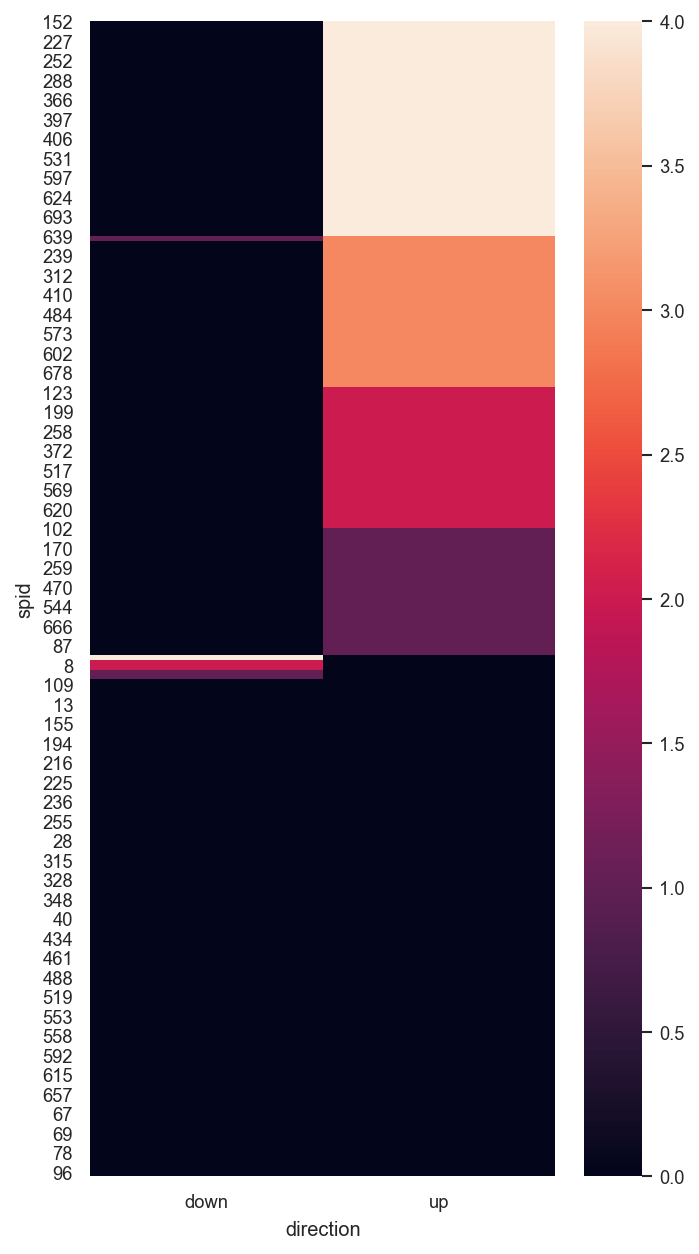

In [105]:
piv2=mchits.pivot_table(columns='direction', index='spid', values='hit111', fill_value=0)
fig, ax = plt.subplots(1, figsize=(5,10))
sns.heatmap(piv2.sort_values(['up','down'], ascending=False));

In [106]:
mchits=mchits[mchits.hit111>0]
scdupes=dupes
dupes=list(set(mchits[mchits.spid.duplicated(keep=False)].sort_values('spid').spid))
dupes.extend(scdupes)
len(dupes)

1

In [107]:
mchits.direction.value_counts()

direction
up      130
down      6
Name: count, dtype: int64

In [108]:
schits

,spid,direction,hit,meas
536,352,down,3,ROS
462,319,down,2,ROS
796,484,down,1,ROS
1365,98,up,3,ROS
1317,76,up,3,ROS
...,...,...,...,...
499,335,up,3,ROS
503,337,up,1,ROS
635,397,up,1,ROS
589,376,up,3,ROS


In [109]:
schits.columns=['spid','direction','sc_hit','meas']
mchits.columns=['spid','direction','mc_hit111','meas']
schits.spid=schits.spid.astype(int)
mchits.spid=mchits.spid.astype(int)

/var/folders/h1/vdxppln90rb2qskbcxvx3m5c0000gn/T/ipykernel_87574/3608875572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mchits.spid=mchits.spid.astype(int)


In [110]:
hits=schits.merge(mchits, how='outer')
hits=hits[['meas','spid','sc_hit','mc_hit111','direction',]]
hits['keep']=np.nan
hits.to_csv(f'./MC_hits/{meas}_MC_hits.csv')

In [111]:
hits[hits.spid.astype(str).isin(dupes)].sort_values('spid').to_csv(f'./MC_hits/{meas}_MC_dupes.csv')
hits[hits.spid.astype(str).isin(dupes)].sort_values('spid').head()

,meas,spid,sc_hit,mc_hit111,direction,keep
148,ROS,639,NaN,1.0,down,NaN
149,ROS,639,3.0,3.0,up,NaN


In [112]:
hits[hits.spid==212]

,meas,spid,sc_hit,mc_hit111,direction,keep


# SC-MC reconcile

In [113]:
schits=pd.read_csv(f'./SC_hits/{meas}_SC_hits.csv', index_col=0)
mchits=pd.read_csv(f'./MC_hits/{meas}_MC_hits.csv', index_col=0)
mchits=mchits.drop(columns='sc_hit')
mchits=mchits.dropna(subset=['mc_hit111'])
schits.columns

Index(['spid', 'direction', 'hit', 'meas'], dtype='object')

In [114]:
schits.columns=['spid','direction','sc_hit','meas']
mchits=mchits[['spid','direction','mc_hit111','meas']]
mchits.columns

Index(['spid', 'direction', 'mc_hit111', 'meas'], dtype='object')

In [115]:
import plot_curves as pc
import plate_maps as pm
import importlib

In [116]:
importlib.reload(pc)
raw=pc.tcpl_mc3_to_raw(mc3dat, graphcol='log2_fold_change', fix_raw=True)
curve=pc.tcpl_mc5_to_curve(mc5dat)

In [117]:
curve['LogIC50']=np.log10(curve['IC50']/1000000)

In [118]:
plt.close()

In [119]:
importlib.reload(pc)
for spid in dupes:
    if not os.path.exists(f'./curve_images/{meas}_curves/dupes/{spid}_tcpl_curvefit.png'):
        pc.plot_pct_inhib_curves(compound=spid, curve=curve, raw=raw, graphcol='log2_fold_change', fitcrit='RMSE', targs=raw.Target.unique(), fit='TBMAD',
                                 sharey=True, save_fig=True, save_lab='tcpl',save_dir=f'./curve_images/{meas}_curves/dupes')

In [120]:
# hits.spid.astype(str).tolist()
hits
curve.columns

Index(['m5id', 'flag', 'Compound', 'chid', 'casn', 'Target', 'm4id', 'bmad',
       'resp_max', 'resp_min', 'max_mean', 'max_mean_conc', 'max_med',
       'max_med_conc', 'logc_max', 'logc_min', 'nconc', 'npts', 'nrep',
       'nmed_gtbl', 'hitc', 'modl', 'fitc', 'coff', 'actp', 'modl_er', 'top',
       'modl_ga', 'hill', 'modl_la', 'modl_lw', 'RMSE', 'modl_prob',
       'modl_acc', 'modl_acb', 'modl_ac10', 'resp_unit', 'conc_unit', 'IC50',
       'pIC50', 'bottom', 'notes', 'LogIC50'],
      dtype='object')

In [121]:
# %debug
# plot all
importlib.reload(pc)
for spid in hits.spid.astype(str).unique().tolist():
# for spid in ['207']
    if spid in raw.Compound.unique().tolist():
        # print(spid)
        # if spid not in dupes:
        if not os.path.exists(f'./curve_images/{meas}_curves/{spid}_tcpl_curvefit.png'):
            pc.plot_pct_inhib_curves(compound=spid, curve=curve, raw=raw, graphcol='log2_fold_change', fitcrit='RMSE', targs=raw.Target.unique(), fit="TBMAD", 
                                     sharey=True, save_fig=True, save_lab='tcpl',save_dir=f'./curve_images/{meas}_curves/')

In [122]:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from PIL import Image as PILImage
from openpyxl.utils.dataframe import dataframe_to_rows

# Directory where the curve images are stored
curve_images_dir = f'./curve_images/{meas}_curves/'
output_file = f'./MC_hits/{meas}_MC_hits_with_images.xlsx'
# # Check if the output file exists
# if os.path.exists(output_file):
#     # Load the existing Excel file
#     wb = load_workbook(output_file)
#     ws = wb.active
# else:
# Create a new workbook and worksheet
wb = Workbook()
ws = wb.active
# Add headers if needed
ws.append(hits.columns.tolist() + ['curve_image'])
# Insert the hits DataFrame into the worksheet
for row in dataframe_to_rows(hits, index=False, header=False):
    ws.append(row)

# Iterate through the hits DataFrame and add the corresponding images
for index, row in hits.iterrows():
    spid = row['spid']
    if str(spid) in raw.Compound.unique():
        image_path = os.path.join(curve_images_dir, f'{spid}_tcpl_curvefit.png')
        if image_path:
            img = Image(image_path)

            # Calculate the cell position (assuming the image should be in the last column)
            cell = f'G{index + 2}'  # Adjust the column letter as needed
            
            # Add the image to the worksheet
            # Resize the cell to fit the image
            ws.row_dimensions[index + 2].height = 150  # Adjust the height as needed
            ws.column_dimensions['G'].width = 60  # Adjust the width as needed

            # Resize the image
            img.width = 480  # Adjust the width as needed
            img.height = 200  # Adjust the height as needed

            ws.add_image(img, cell)

# Save the workbook
wb.save(output_file)

print(f'Saved hits DataFrame with images to {output_file}')

Saved hits DataFrame with images to ./MC_hits/ROS_MC_hits_with_images.xlsx


### manually go through hit curves and choose up or down as 'better' direction

In [741]:
chems[chems.spid==207]

,spid,chid,chnm,casn,dsstox_substance_id,alt_name_1,alt_name_2,alt_name_3,CASRN_ID,CASRN_alt,...,source,Morgan,SMDC,Proprietary,MRP3_comb,APR_toxcast_MMP,SMDC_new,Chembl_txp_all,Hafey,base_rdkit_smiles
227,207,201,dimethyl sulfoxide,679,DTXSID2021735,NaN,NaN,NaN,67-68-5,NaN,...,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C[S+](C)[O-]


In [742]:
0<np.nan

False

In [743]:
# pm.draw_plate_heatmap(barcode="00003GSK-DR-MA01")
meas

'GSH'

In [744]:
dc=pd.read_csv(f'./MC_hits/{meas}_MC_hits_cur.csv', index_col=0)
dc['relation']=np.nan



In [745]:
dc=dc[~dc.keep.str.contains('*', regex=False)]
dc.keep=dc.keep.str.replace('y','1').str.replace('n','0')
dc.keep=dc.keep.astype(int)
dc['iddir']=dc.spid.astype(str)+dc.direction
mchits['iddir']=mchits.spid.astype(str)+mchits.direction
mchits=mchits.merge(dc[['iddir','keep','relation']])
print(mchits.shape)
mchits.head(2)

(225, 7)


,spid,direction,mc_hit111,meas,iddir,keep,relation
0,8,down,1.0,GSH,8down,0,NaN
1,8,up,1.0,GSH,8up,0,NaN


In [746]:
schits

,spid,direction,sc_hit,meas
0,10,down,0,GSH
556,361,down,0,GSH
558,362,down,0,GSH
1086,62,down,0,GSH
560,363,down,0,GSH
...,...,...,...,...
615,388,up,0,GSH
617,389,up,0,GSH
619,39,up,0,GSH
623,391,up,0,GSH


In [747]:
allhits=schits[['spid','sc_hit','direction']].merge(mchits, how='outer')
allhits=allhits.drop_duplicates()
print(allhits.shape)
allhits.head()

(1384, 8)


,spid,sc_hit,direction,mc_hit111,meas,iddir,keep,relation
0,7,0.0,down,NaN,NaN,NaN,NaN,NaN
1,7,0.0,up,NaN,NaN,NaN,NaN,NaN
2,8,0.0,down,1.0,GSH,8down,0.0,NaN
3,8,0.0,up,1.0,GSH,8up,0.0,NaN
4,9,1.0,down,NaN,NaN,NaN,NaN,NaN


In [748]:
# # if curated says no don't keep, change mc_hit_cur to 0
# allhits['mc_hit_cur']=allhits.mc_hit
# allhits.loc[allhits.keep==0, 'mc_hit_cur']=0

In [749]:
# any actives mean count as active
allhits['active']=allhits[['sc_hit', 'mc_hit111']].max(axis='columns')
allhits.active=[0 if x==0 else 1 for x in allhits.active]
# if curated says no don't keep, change active to 0
allhits.loc[allhits.keep==0, 'active']=0
allhits.head(2)

,spid,sc_hit,direction,mc_hit111,meas,iddir,keep,relation,active
0,7,0.0,down,NaN,NaN,NaN,NaN,NaN,0
1,7,0.0,up,NaN,NaN,NaN,NaN,NaN,0


In [750]:
allhits.shape

(1384, 9)

In [751]:
chems.columns

Index(['spid', 'chid', 'chnm', 'casn', 'dsstox_substance_id', 'alt_name_1',
       'alt_name_2', 'alt_name_3', 'CASRN_ID', 'CASRN_alt', 'ATOM_LOT',
       'ATOM_ID_GSK', 'compound_id', 'names_new', 'pcid_from_name', 'smiles',
       'smiles_pcid', 'Unnamed: 17', 'pubchem_smiles', 'source', 'Morgan',
       'SMDC', 'Proprietary', 'MRP3_comb', 'APR_toxcast_MMP', 'SMDC_new',
       'Chembl_txp_all', 'Hafey', 'base_rdkit_smiles'],
      dtype='object')

In [783]:
measchems = chems[chems.spid.isin(allhits.spid.unique())]
measchems.columns=['spid', 'chid', 'Name', 'Pubchem_CID', 'dsstox_substance_id', 'alt_name_1',
       'alt_name_2', 'alt_name_3', 'CASRN_ID', 'CASRN_alt', 'ATOM_LOT',
       'ATOM_ID_GSK', 'compound_id', 'names_new', 'pcid_from_name', 'smiles',
       'smiles_pcid', 'Unnamed: 17', 'pubchem_smiles', 'source', 'Morgan',
       'SMDC', 'Proprietary', 'MRP3_comb', 'APR_toxcast_MMP', 'SMDC_new',
       'Chembl_txp_all', 'Hafey', 'base_rdkit_smiles']


In [786]:
measchems[measchems.Proprietary==1].iloc[0].T

spid                              8
chid                              8
Name                       000008_1
Pubchem_CID                000008_1
dsstox_substance_id         NOTOX_8
alt_name_1             ATOM000008_1
alt_name_2                      NaN
alt_name_3                      NaN
CASRN_ID                 ATOM000366
CASRN_alt                       NaN
ATOM_LOT                        1.0
ATOM_ID_GSK              ATOM000366
compound_id            ATOM000008_1
names_new                       NaN
pcid_from_name                  NaN
smiles                          NaN
smiles_pcid                     NaN
Unnamed: 17                     NaN
pubchem_smiles                  NaN
source                        SA200
Morgan                          0.0
SMDC                            1.0
Proprietary                     1.0
MRP3_comb                       1.0
APR_toxcast_MMP                 0.0
SMDC_new                        0.0
Chembl_txp_all                  0.0
Hafey                       

In [ ]:
measchems=measchems[['spid', 'Name', 'Pubchem_CID', 'smiles', 'source','base_rdkit_smiles']]

In [ ]:
# allhits=measchems.merge(allhits[['Target', 'Compound', 'nconc', 'npts', 'nrep', 'AC50_uM', 'pIC50','notes', 'flag',]], how='left', )
allhits=measchems.merge(allhits, how='left')

,spid,Name,Pubchem_CID,smiles,source,base_rdkit_smiles,sc_hit,direction,mc_hit111,meas,iddir,keep,relation,active,measdir,sumhits
0,19,vofopitant,6918331,COc1ccc(cc1CN[C@H]1CCCN[C@H]1c1ccccc1)-n1nnnc1...,SA200,COc1ccc(-n2nnnc2C(F)(F)F)cc1CN[C@H]1CCCN[C@H]1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,450,vofopitant,6918331,COc1ccc(cc1CN[C@H]1CCCN[C@H]1c1ccccc1)-n1nnnc1...,New,COc1ccc(-n2nnnc2C(F)(F)F)cc1CN[C@H]1CCCN[C@H]1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,164,zafirlukast,5717,COc1cc(ccc1Cc1cn(C)c2ccc(NC(=O)OC3CCCC3)cc12)C...,SA200,COc1cc(C(=O)NS(=O)(=O)c2ccccc2C)ccc1Cc1cn(C)c2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,176,sb-281832,9931156,OCC(CO)n1cnc(c1-c1ccnc(Oc2ccccc2)n1)-c1ccc(F)cc1,SA200,OCC(CO)n1cnc(-c2ccc(F)cc2)c1-c1ccnc(Oc2ccccc2)n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,402,raloxifene,5035,Oc1ccc(cc1)-c1sc2cc(O)ccc2c1C(=O)c1ccc(OCCN2CC...,New,O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccc(O)cc2)sc2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [754]:
allhits.to_csv(f'{meas}_all_hits.csv')

In [755]:
uphits=allhits[allhits.direction=='up']
uphits.active.value_counts()

active
0    566
1    129
Name: count, dtype: int64

In [756]:
uphits.columns=['compound_id', 'Name', 'Pubchem_CID', 'smiles', 'source', 'base_rdkit_smiles',
       'direction', 'sc_hit', 'meas', 'mc_hit', 'iddir', 'keep','relation',
       'active']
uphits=uphits[['compound_id', 'base_rdkit_smiles', 'active', 'source']]

In [757]:
uphits.compound_id='SPID'+uphits.compound_id.astype(str)

In [758]:
uphits.to_csv(f'{meas}_hits_up_class.csv', index=False)

In [759]:
downhits=allhits[allhits.direction=='down']
downhits.active.value_counts()
downhits.columns=['compound_id', 'Name', 'Pubchem_CID', 'smiles', 'source', 'base_rdkit_smiles',
       'direction', 'sc_hit', 'meas', 'mc_hit', 'iddir', 'keep','relation',
       'active']
downhits=downhits[['compound_id', 'base_rdkit_smiles', 'active', 'source']]
downhits.compound_id='SPID'+downhits.compound_id.astype(str)
downhits.to_csv(f'{meas}_hits_dn_class.csv', index=False)

In [760]:
downhits.active.value_counts()

active
0    676
1     13
Name: count, dtype: int64

# plot all curated hits

In [761]:
directory='../datasets/cell_health/'
hitsall=[]
for file in os.listdir(directory):
    if 'class' in file:
        pass
    else:
        tmphits=pd.read_csv(os.path.join(directory,file), index_col=0)
        hitsall.append(tmphits)
allhits=pd.concat(hitsall)
allhits['measdir']=allhits.meas+'_'+allhits.direction
allhits['sumhits']=allhits.sc_hit+allhits.mc_hit111
allhits=allhits.dropna(subset='meas')
allhits.head(2)

,spid,Name,Pubchem_CID,smiles,source,base_rdkit_smiles,sc_hit,direction,mc_hit111,meas,iddir,keep,relation,active,measdir,sumhits
2,450,vofopitant,6918331,COc1ccc(cc1CN[C@H]1CCCN[C@H]1c1ccccc1)-n1nnnc1...,New,COc1ccc(-n2nnnc2C(F)(F)F)cc1CN[C@H]1CCCN[C@H]1...,NaN,down,2.0,NucArea,450down,1.0,NaN,1,NucArea_down,NaN
7,402,raloxifene,5035,Oc1ccc(cc1)-c1sc2cc(O)ccc2c1C(=O)c1ccc(OCCN2CC...,New,O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccc(O)cc2)sc2...,NaN,down,2.0,NucArea,402down,1.0,NaN,1,NucArea_down,NaN


In [765]:
piv3=allhits.pivot_table(index='spid', columns='measdir',values='active', fill_value=0).reset_index()
piv3['pcid']=piv3.spid.astype(str).map(pcidmap)
piv3.pcid=piv3.pcid.astype(str)
dilirank.DILIRank_PubChem_CID=dilirank.DILIRank_PubChem_CID.astype(str)
piv3=piv3.merge(dilirank, left_on='pcid', right_on='DILIRank_PubChem_CID', how='left')
piv3.DILIRank_PubChem_CID=piv3.DILIRank_PubChem_CID.astype(str)

In [773]:
meascols=['CellCount_down', 'CellCount_up', 'GSH_down', 'GSH_up',
       'MMP_down', 'MMP_up', 'MitoStruct_down', 'MitoStruct_up',
       'NucArea_down', 'NucArea_up', 'NucMask_down', 'NucMask_up', 'ROS_down',
       'ROS_up']
# meascols=['CellCount_down', 'GSH_up', 'MMP_up', 'MitoStruct_up',
#        'NucArea_down', 'NucMask_up','ROS_up']

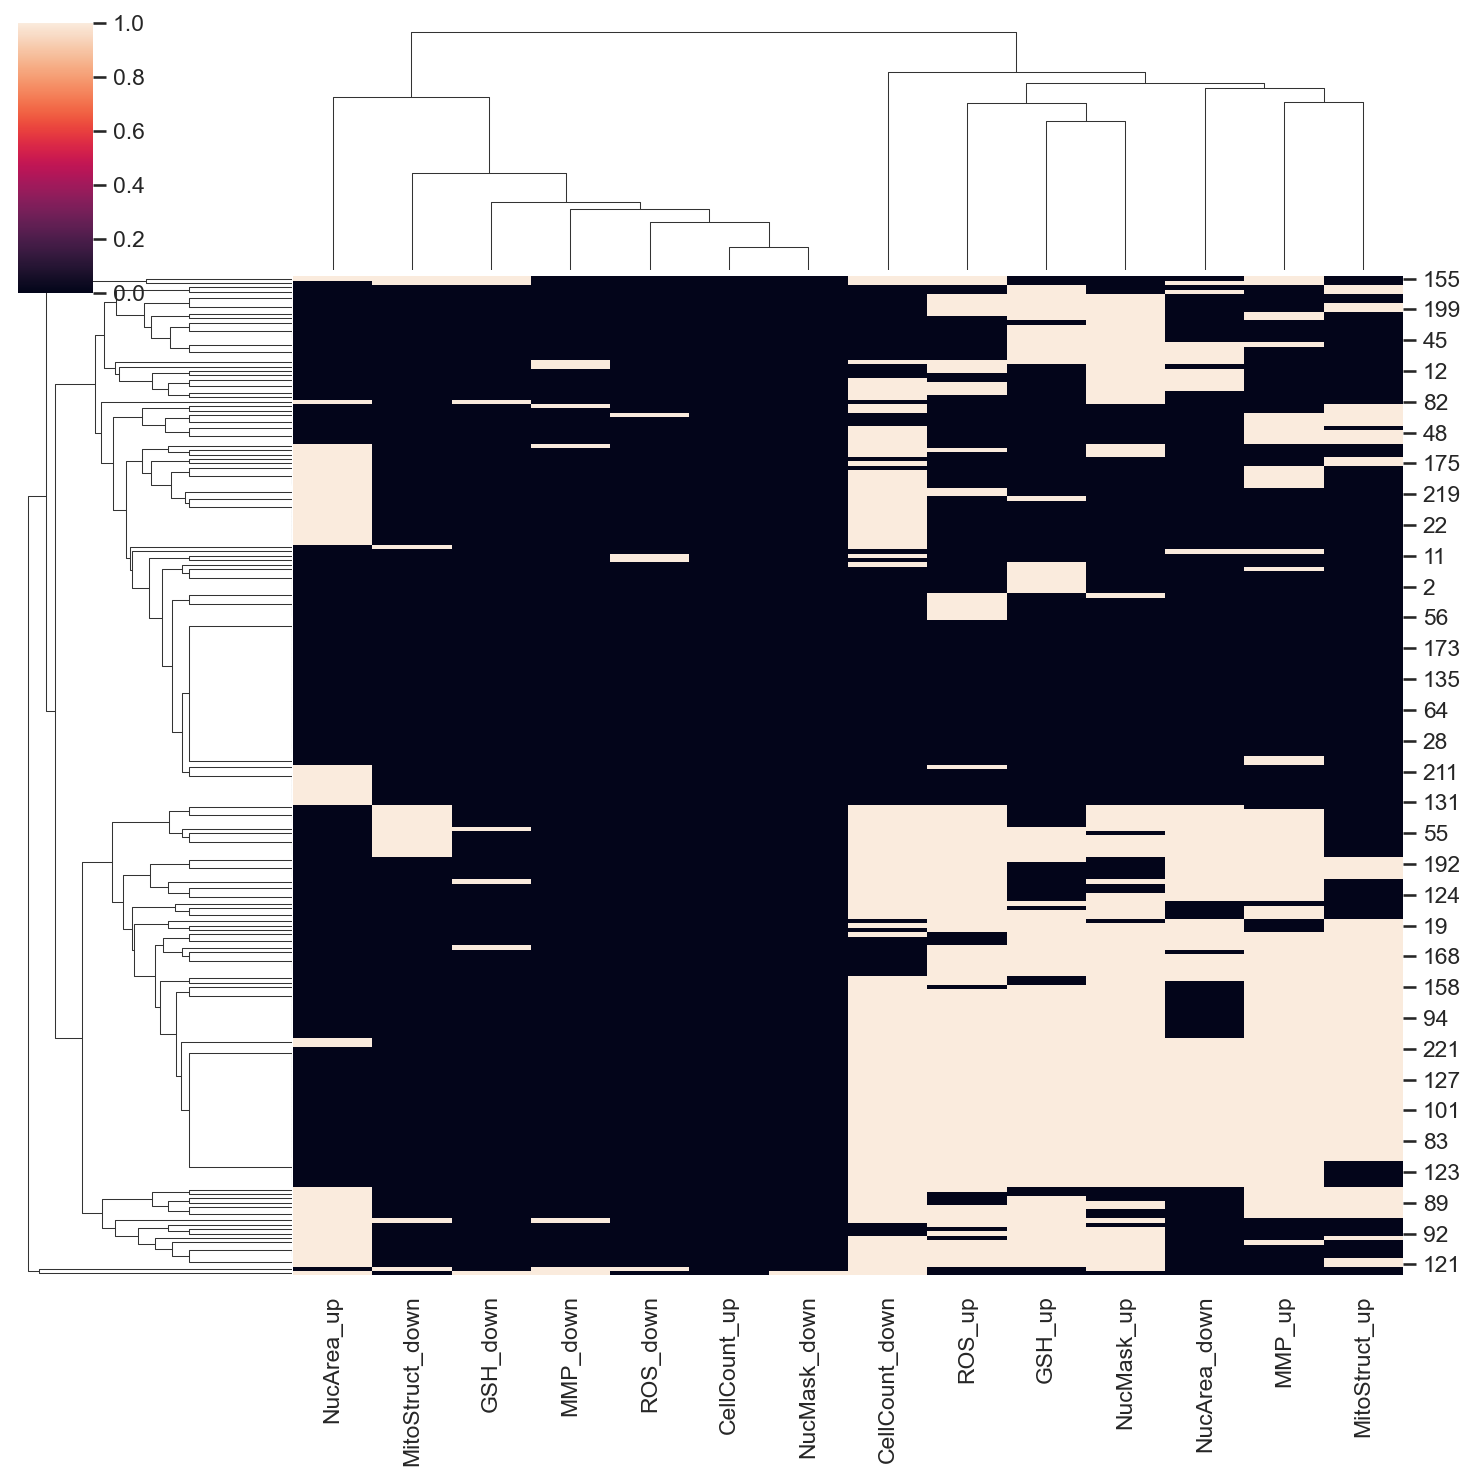

In [776]:
sns.clustermap(piv3[meascols])

In [768]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score
import importlib
importlib.reload(pfma)

<module 'plotting_functions_misc_akp' from '/Users/apaulson/repos/data-proc/plotting_functions_misc_akp.py'>

In [769]:
meascols=['CellCount_down', 'GSH_up', 'MMP_up', 'MitoStruct_up',
       'NucArea_down', 'NucMask_up','ROS_up']

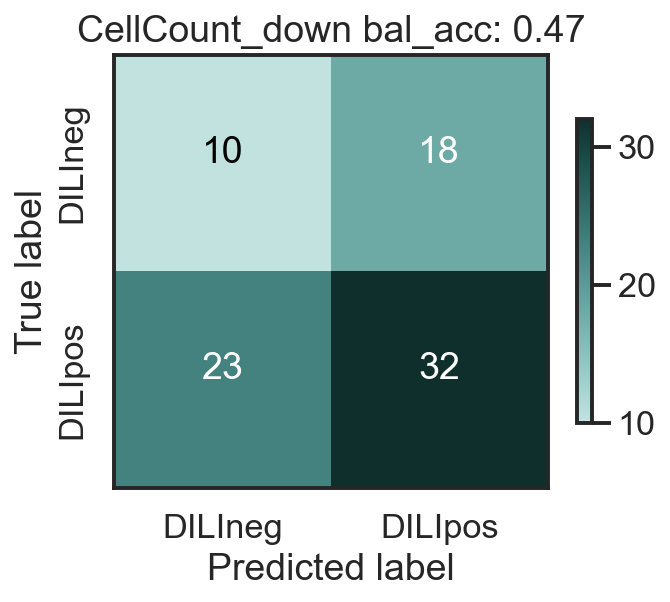

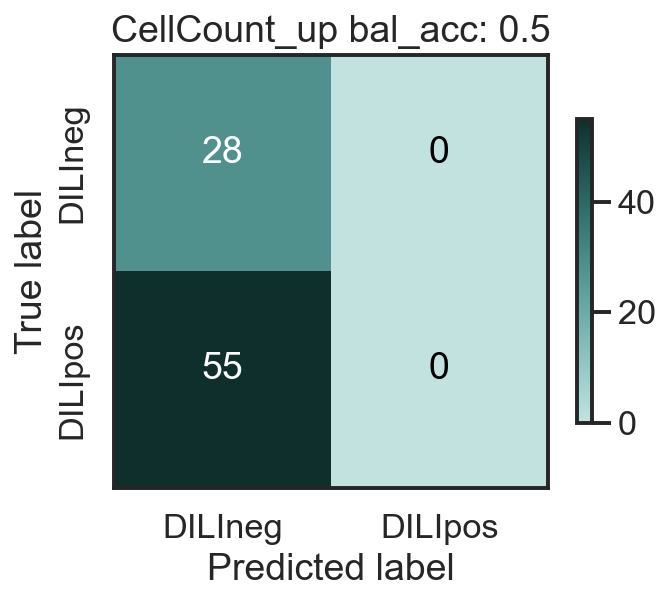

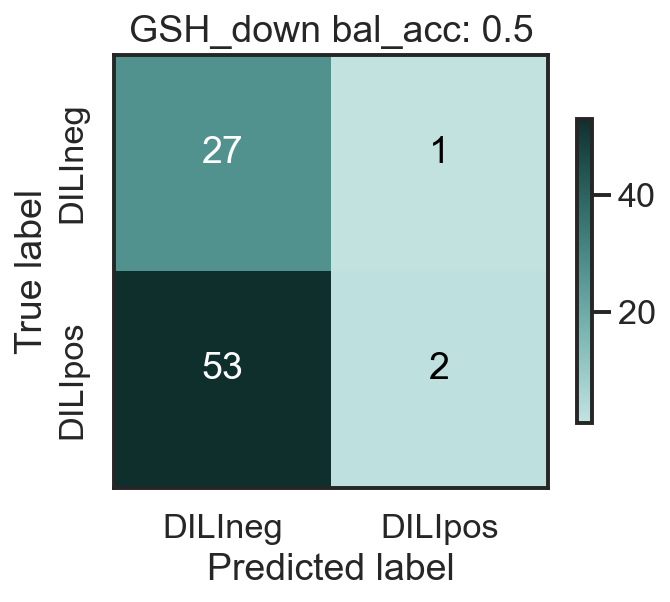

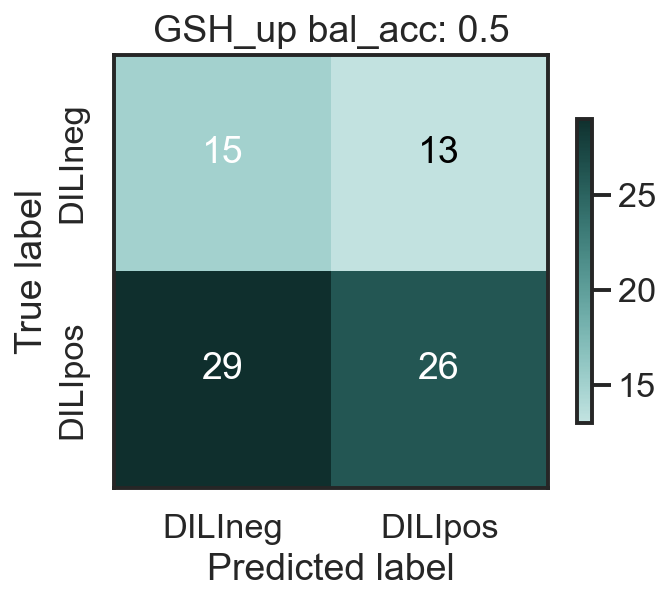

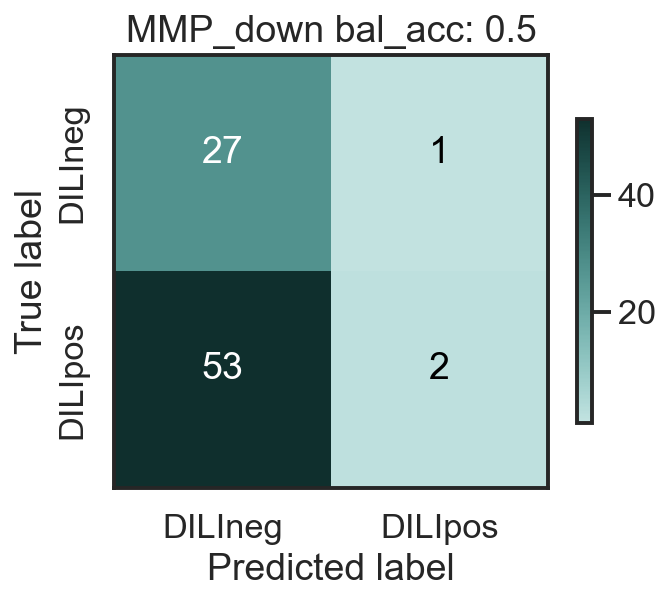

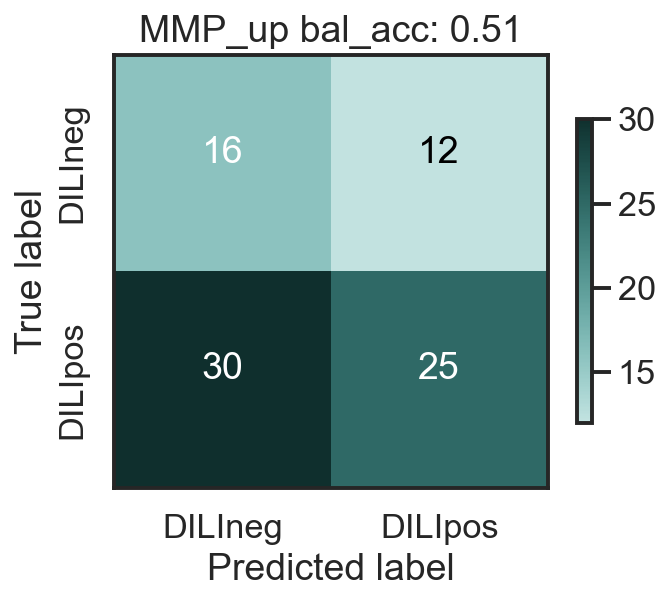

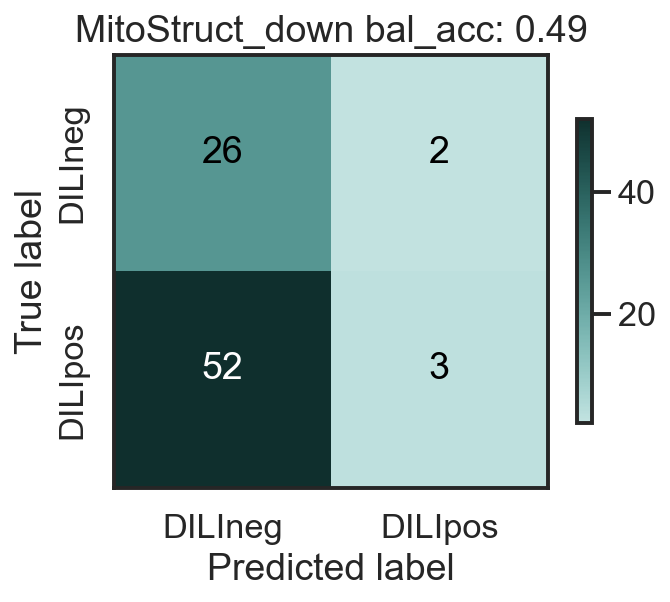

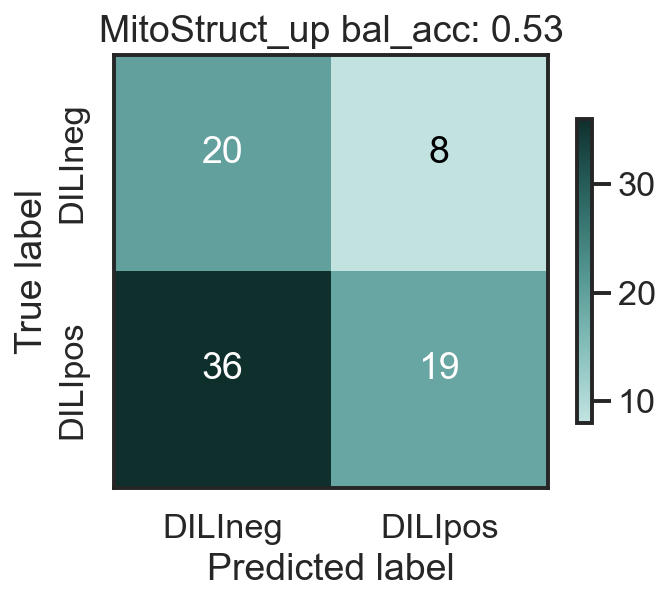

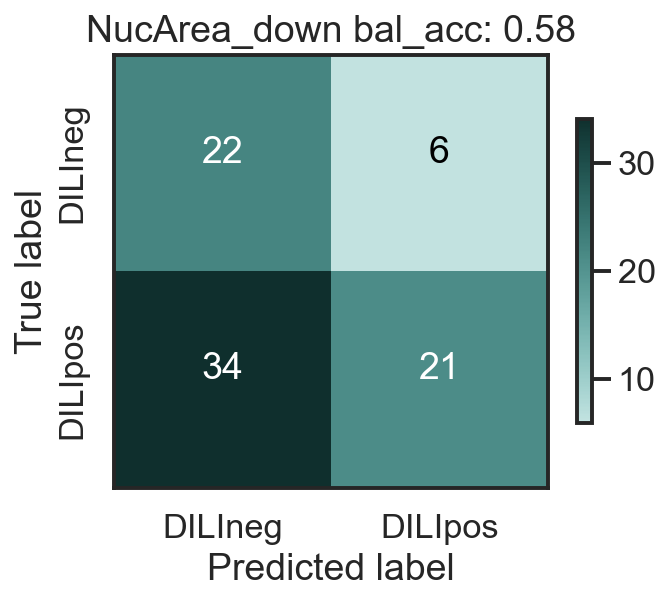

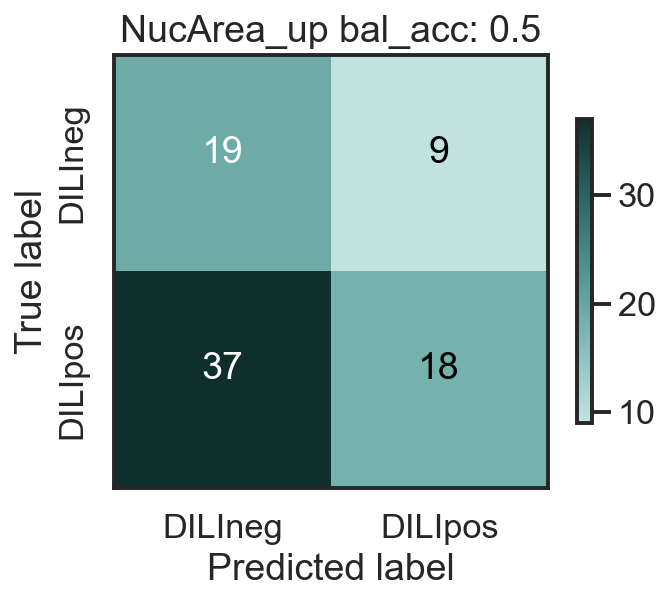

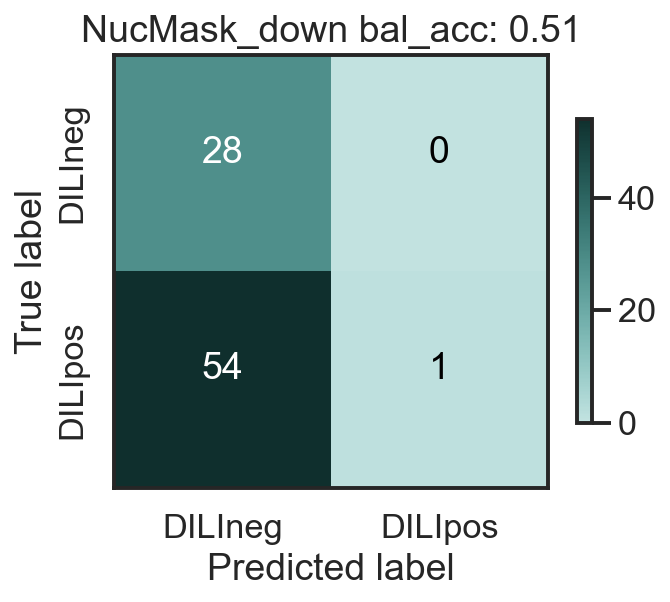

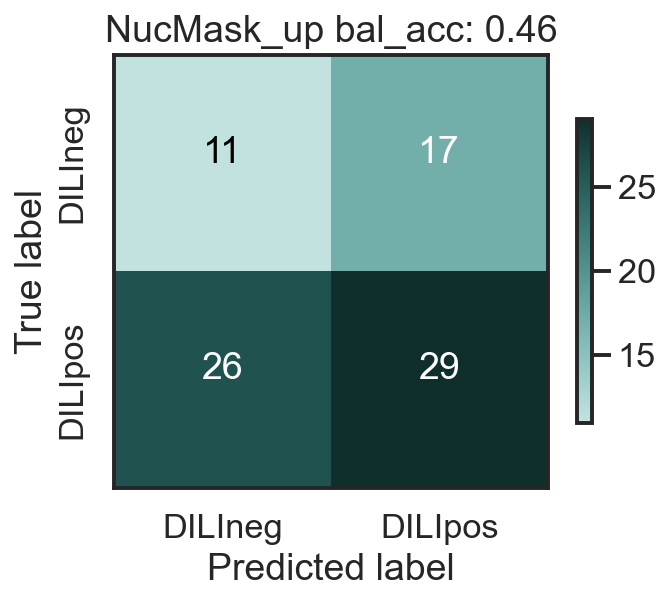

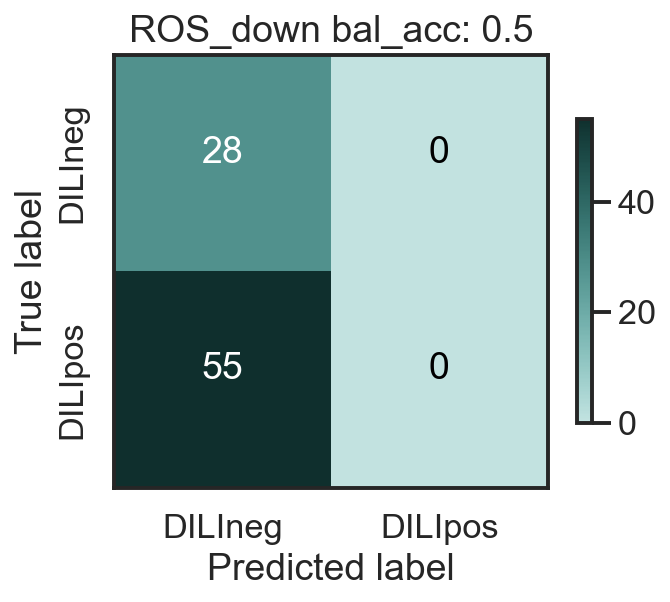

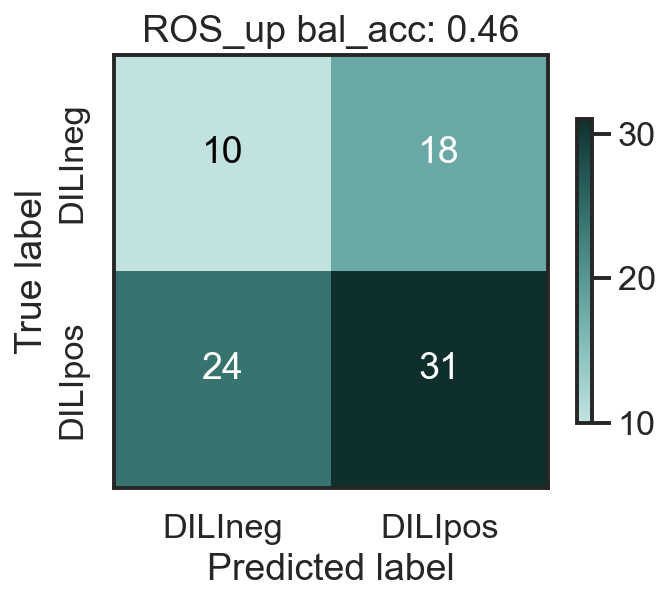

In [779]:
sns.set_theme('talk', style='white')
cms={}
balacc={}
class_names=['DILIneg','DILIpos']
for col in meascols:
    tmpdf=piv3[['DILIst_Classification',col]].dropna()
    tmpdf[col]=[1 if x > 0 else 0 for x in tmpdf[col]]
    cms[col]=confusion_matrix(tmpdf['DILIst_Classification'],tmpdf[col])
    balacc[col]=round(balanced_accuracy_score(tmpdf['DILIst_Classification'],tmpdf[col]),2)
    fig, ax = plt.subplots(1)
    im=pfma.plot_confusion_matrix(cms[col], classes=class_names, normalize=False, cmap=sns.cubehelix_palette(rot=0, start=2.40, as_cmap=True), ax=ax)
    fig.colorbar(mappable=im, shrink=0.7)
    ax.set_title(f'{col} bal_acc: {balacc[col]}')

Balanced Accuracy: 0.8
